In [1]:
from google.colab import files #upload data file ke google colab
uploaded = files.upload()  
import pandas as pd #pengelola : penyelarasan, pebanding, penggabung data
import seaborn as sns #membantu perbaiki tampilan visual
import matplotlib.pyplot as plt #library untuk tampil output desain plot
%matplotlib inline

Saving Breast_cancer_data.csv to Breast_cancer_data (2).csv


pada bagian ini berisi definisi yang diperlukan.

In [3]:
df = pd.read_csv("Breast_cancer_data.csv", delimiter=",")  #pembacaan data csv, model delimeter

pada bagian ini, dimulainya pembacaan file csv

In [4]:
df.head(450) #tampil 450 (80%) baris teratas tabel, dari 570 data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
445,11.99,24.89,77.61,441.3,0.10300,1
446,17.75,28.03,117.30,981.6,0.09997,0
447,14.80,17.66,95.88,674.8,0.09179,1
448,14.53,19.34,94.25,659.7,0.08388,1


In [5]:
df.columns  #tampil isi kolom

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [6]:
df.isnull().sum()  #pembacaan apabila ada data yang kosong 

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [7]:
count = df.diagnosis.value_counts()   #pembacaan jumlah data diagnosa output 1 dan 0
count

1    357
0    212
Name: diagnosis, dtype: int64

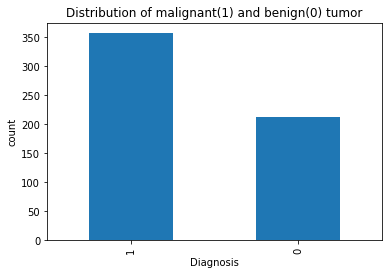

In [8]:
count.plot(kind='bar')  #bentuk tampilan jumlah data diagnosa output 1 dan 0, bentuk bar.
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");

pada bagian ini ditampilkan banyaknya nilai dari variabel (0 dan 1).
nilai 0 didefinisikan sebagai Normal/ Tumor Jinak.
dan nilai 1 didefinisikan sebagai Tumor Ganas. 

In [9]:
y_target = df['diagnosis']  #definisikan diagnosis sebagai y_target

In [10]:
df.columns.values  #definisikan kolom

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [11]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) # mengubah data menjadi sebuah kategori huruf B dan M.

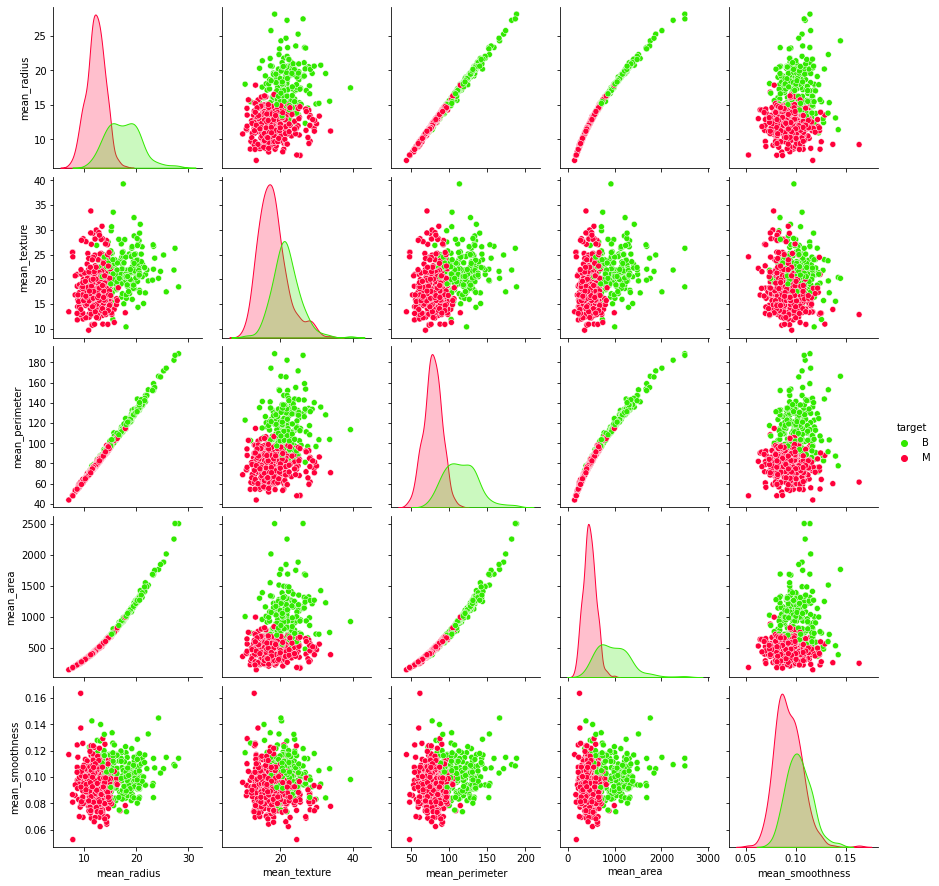

In [12]:
g = sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='prism');

pada bagian ini ditampilkan banyaknya kategori pemilihan fitur.

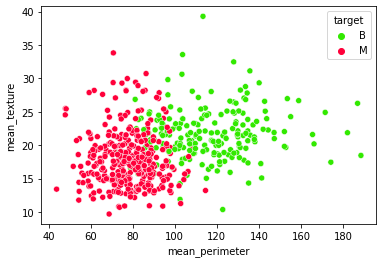

In [13]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target', palette='prism'); 

pada bagian ini diambilah fitur yang akan diolah, fitur ini terletak pada baris ke 2, kolom ke 3.  

In [14]:
features = ['mean_perimeter', 'mean_texture']  #fitur yang diolah 

In [15]:
X_feature = df[features] # X_feature = df.drop(['target','diagnosis'], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.3, random_state = 42)

setelah fitur terpilih, lalu diberikan split, dibagi x (train & test), y (train & test). 

In [18]:
from sklearn.linear_model import LogisticRegression  #logisticRegression untuk pengelolaan prediksi dan kurva
from sklearn.metrics import accuracy_score #sklearn.metrics untuk mengelola nilai akurasi prediksi

setelah itu ditambahkan model logistik untuk mengelola prediksi, dan model metriks untuk mengelola nilai akurasi prediksi tersebut.

In [19]:
model = LogisticRegression() 

In [20]:
model.fit(X_train, y_train)  #definisi train x dan y 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
from mlxtend.plotting import plot_decision_regions   #definisi plot

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


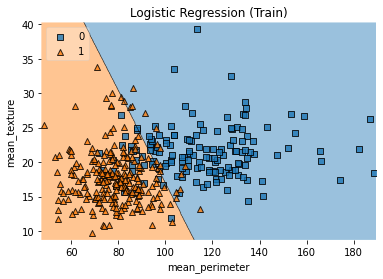

In [22]:
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2) #running train menggunakan logistic regression
plt.title("Logistic Regression (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

pada bagian ini, model yang digunakan yaitu Decision boundary dan logistic regression, dan fitur yang di olah yaitu mean_perimeter dan mean_texture.
Logistic regresstion berfungsi membantu dalam pengelolaan nilai prediksi, dan Decision boundary berfungsi dalam memberi keputusan (perbedaan nilai),
dibagian ini model knn belum diterapkan.
hasil yang ditampilkan ini adalah training (x & y). bisa dilihat data sebaran masih menggerombol.

In [23]:
y_pred = model.predict(X_test)

In [24]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100) #nilai output akurasi 

Accuracy score using Logistic Regression: 91.81286549707602


pada bagian ini nilai akurasi sementara yang didapatkan hanya menggunakan logistik yaitu sebanyak : 91,81

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


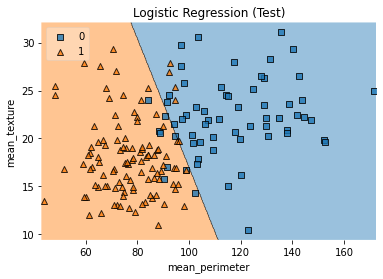

In [25]:
plot_decision_regions(X_test.values, y_test.values, clf=model, legend=2)
plt.title("Logistic Regression (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

pada bagian ini tampilan plot yang menggunakan dari nilai (x_test & y_test). pada tampilan diatas, data sebaran sudah terpencar.

In [26]:
#Penggunaan confusion matrix
from sklearn.metrics import confusion_matrix

pada bagian ini dipakainya Confusion matrix, yang merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [27]:
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[ 54,   9],
       [  5, 103]])

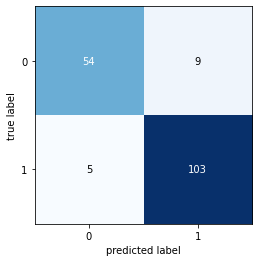

In [29]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [30]:
#menggunakan algoritma klasifikasi KNN 
from sklearn.neighbors import KNeighborsClassifier

pada bagian ini digunakanlah algoritma knn untuk memperbaiki hasil train, test, prediksi dan nilai akurasi, dengan menggunakan pemilahan tetangga terdekat berdasarkan nilai K.

In [31]:
clf = KNeighborsClassifier(10) #nilai K = 10
print (KNeighborsClassifier)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


untuk sementara nilai K yang digunakan yaitu K = 10.

In [32]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [33]:
y_pred = clf.predict(X_test)

In [34]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)

Accuracy score using KNN: 92.39766081871345


pemnghitungan hasil akurasi setelah peggunaan algoritma KNN. yaitu 92,39. nilai ini menyesuaikan dengan nilai K yang dipakai.

In [35]:
confusion_matrix(y_test, y_pred)

array([[ 55,   8],
       [  5, 103]])

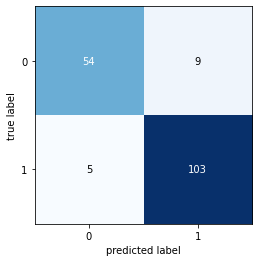

In [36]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


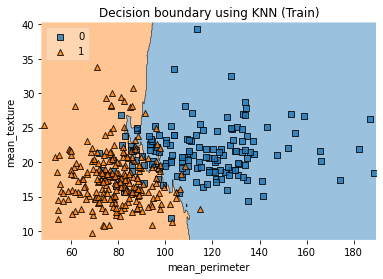

In [37]:
plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

menampilkan hasil Train yang di perolah dari variabel value Train (x dan y). terlihat data yang ditampilkan masih menggerombol.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


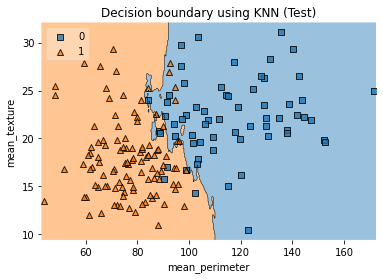

In [38]:
plot_decision_regions(X_test.values, y_test.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

menampilkan hasil Test yang di perolah dari variabel value Test (x dan y). terlihat data yang ditampilkan sudah tersebar.
hasilnya yang dapat diperoleh yaitu nilai akurasi yang benar 92%, dan kesalahan 8% dalam mengklasifikasi tumor ganas dan normal/ jinak.